In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

Mounted at /content/drive


In [ ]:
n = 10
test_num = 30

In [ ]:
# 30일 후 데이터 예측
X = np.array([df['value'].values[i:i+n] for i in range(len(df)-n-30+1)])
y = np.array([df['value'].values[i+n+30-1] for i in range(len(df)-n-30+1)])

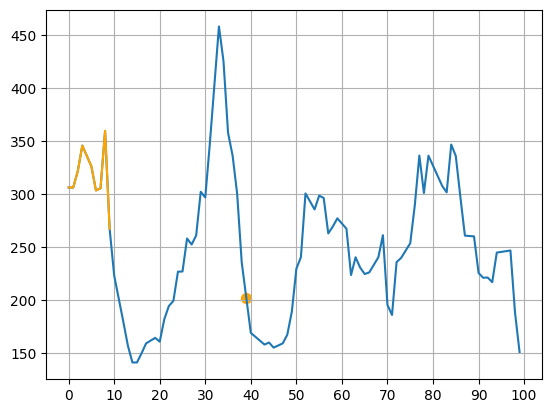

In [ ]:
plt.plot(df['value'].values[:100])
plt.plot(X[0], color='orange')
plt.scatter(9+30, y[0], color='orange', s=50)
plt.xticks([10*i for i in range(11)])
plt.grid(True)

In [ ]:
len(X), len(y)

(25950, 25950)

In [ ]:
X.shape, y.shape

((25950, 10), (25950,))

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
X_test, y_test = X[-test_num:], y[-test_num:]

In [2]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(np.array(X[:-test_num]), np.array(y[:-test_num]), test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20736, 10, 1), (5184, 10, 1), (20736,), (5184,))

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

In [ ]:
# def make_pred(num, model):
#     data_pred = np.array(df['value'].values[:-test_num])
#     for i in range(num):
#         temp = data_pred[-n:]
#         pred = model.predict(temp.reshape(1, -1))
#         data_pred = np.append(data_pred, pred)
#     return data_pred[-num:]

In [3]:
model1 = Sequential()
model1.add(GRU(200, input_shape=[None, 1]))
model1.add(Dense(1))

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 200)               121800    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 122001 (476.57 KB)
Trainable params: 122001 (476.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# history1 = model1.fit(X_train, y_train,
#                     epochs=50,
#                     batch_size=32,
#                     validation_data=(X_val, y_val),
#                     verbose=1)

Epoch 1/50
648/648 [==============================] - 9s 4ms/step - loss: 7190.6079 - mae: 64.2195 - val_loss: 2881.5627 - val_mae: 34.2670
Epoch 2/50
648/648 [==============================] - 2s 4ms/step - loss: 1714.4828 - mae: 25.8624 - val_loss: 1147.1221 - val_mae: 21.9346
Epoch 3/50
648/648 [==============================] - 2s 4ms/step - loss: 890.3552 - mae: 19.4816 - val_loss: 807.0719 - val_mae: 18.3429
Epoch 4/50
648/648 [==============================] - 2s 4ms/step - loss: 710.1894 - mae: 17.9491 - val_loss: 717.3979 - val_mae: 17.5851
Epoch 5/50
648/648 [==============================] - 3s 4ms/step - loss: 667.8852 - mae: 17.5851 - val_loss: 682.4152 - val_mae: 17.3467
Epoch 6/50
648/648 [==============================] - 2s 4ms/step - loss: 643.8476 - mae: 17.3826 - val_loss: 669.3651 - val_mae: 17.8733
Epoch 7/50
648/648 [==============================] - 2s 4ms/step - loss: 643.9661 - mae: 17.4053 - val_loss: 662.4670 - val_mae: 17.8140
Epoch 8/50
648/648 [==========

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

# def make_pred(num, model):
#     data_pred = np.array(df['value'].values[:-test_num])
#     for i in range(num):
#         temp = data_pred[-n:]
#         pred = model.predict(temp.reshape(1, -1), verbose=0)
#         data_pred = np.append(data_pred, pred)
#     return data_pred[-num:]

In [ ]:
# plot_result(history1)

In [ ]:
data_pred = np.array(df['value'].values[:-test_num*2-n+1]) # n=30, tset_num=10일 때 69
pred1 = []
pred_check = [0 for _ in range(30)]
for i in range(30):
    temp = data_pred[i:i+10]
    pred = model1.predict(temp.reshape(1, -1))
    pred1.append(pred[0][0])
    pred_check[i] = [temp, pred[0]]
pred_check

1/1 [==============================] - 0s 17ms/step


[[array([306.1 , 306.  , 321.4 , 345.6 , 335.75, 325.9 , 303.3 , 305.3 ,
         359.5 , 267.2 ]),
  array([230.27065], dtype=float32)],
 [array([306.  , 321.4 , 345.6 , 335.75, 325.9 , 303.3 , 305.3 , 359.5 ,
         267.2 , 223.  ]),
  array([213.17404], dtype=float32)],
 [array([321.4 , 345.6 , 335.75, 325.9 , 303.3 , 305.3 , 359.5 , 267.2 ,
         223.  , 201.3 ]),
  array([188.17972], dtype=float32)],
 [array([345.6 , 335.75, 325.9 , 303.3 , 305.3 , 359.5 , 267.2 , 223.  ,
         201.3 , 179.6 ]),
  array([180.138], dtype=float32)],
 [array([335.75, 325.9 , 303.3 , 305.3 , 359.5 , 267.2 , 223.  , 201.3 ,
         179.6 , 157.1 ]),
  array([167.8809], dtype=float32)],
 [array([325.9, 303.3, 305.3, 359.5, 267.2, 223. , 201.3, 179.6, 157.1,
         141.1]),
  array([162.71428], dtype=float32)],
 [array([303.3, 305.3, 359.5, 267.2, 223. , 201.3, 179.6, 157.1, 141.1,
         141.1]),
  array([164.4948], dtype=float32)],
 [array([305.3, 359.5, 267.2, 223. , 201.3, 179.6, 157.1, 

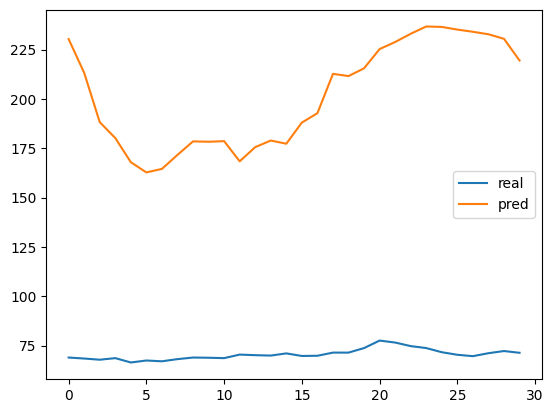

In [ ]:
plt.plot(y_test[:test_num], label='real')
plt.plot(pred1, label='pred')
plt.legend()

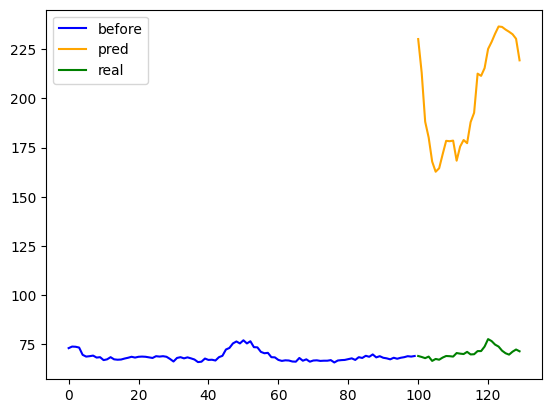

In [ ]:
left_num = 100
plt.plot(df['value'].values[-left_num-test_num:-test_num], label='before', color='blue')
plt.plot(range(left_num, left_num+test_num), pred1, label='pred', color='orange')
plt.plot(range(left_num, left_num+test_num), y_test, label='real', color='green')
plt.legend()

In [ ]:
# data_pred = np.array(df['value'].values[:-t_num])
pred_weird = []
for i in range(pred_num):
    temp = df['value'].values[-n-t_num+i:-t_num+i]
    pred = model1.predict(temp.reshape(1, -1), verbose=0)
    pred_weird.append(pred[0])
pred_weird

In [ ]:
left_num = 100
plt.plot(df['value'].values[-left_num-t_num:-t_num], label='before', color='blue')
plt.plot(range(left_num, left_num+pred_num), pred_weird, label='pred', color='orange')
plt.plot(range(left_num, left_num+pred_num), y_test, label='real', color='green')
plt.legend()

In [ ]:
data_pred_2 = np.array(df['value'].values[:-t_num-100])
for i in range(pred_num+100):
    temp = data_pred_2[-n:]
    pred = model1.predict(temp.reshape(1, -1), verbose=0)
    data_pred_2 = np.append(data_pred_2, pred[0])
pred2 = data_pred_2[-pred_num-100:]

In [ ]:
pred2

In [ ]:
y_test[-t_num-100:]

In [ ]:
t_num2 = t_num + 100
left_num = 70
plt.plot(df['value'].values[-left_num-t_num2:-t_num2], label='before', color='blue')
plt.plot(range(left_num-1, left_num+pred_num+100-1), pred2, label='pred', color='orange')
plt.plot(range(left_num-1, left_num+pred_num+100-1), y[-t_num2:], label='real', color='green')
plt.legend()

In [ ]:
pred_weird2 = []
for i in range(pred_num+100):
    temp = df['value'].values[-n-t_num2+i:-t_num2+i]
    pred = model1.predict(temp.reshape(1, -1), verbose=0)
    pred_weird2.append(pred[0])
pred_weird2

In [ ]:
left_num = 70
plt.plot(df['value'].values[-left_num-t_num2:-t_num2], label='before', color='blue')
plt.plot(range(left_num-1, left_num+pred_num+100-1), pred_weird2, label='pred', color='orange')
plt.plot(range(left_num-1, left_num+pred_num+100-1), y[-t_num2:], label='real', color='green')
plt.legend()

In [ ]:
# model1.save('/content/drive/My Drive/ai_project/model/LSTM5.keras')

In [ ]:
model1 = keras.models.load_model('/content/drive/My Drive/ai_project/model/LSTM5.keras')